
🌲 Training RandomForest with 500 trees...


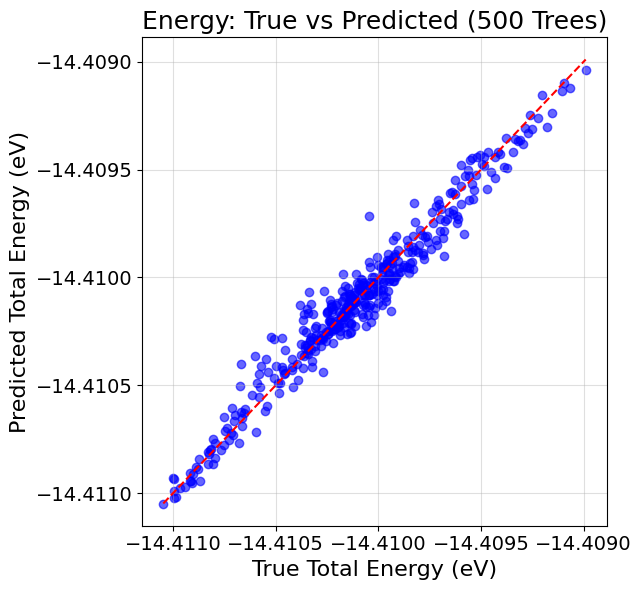

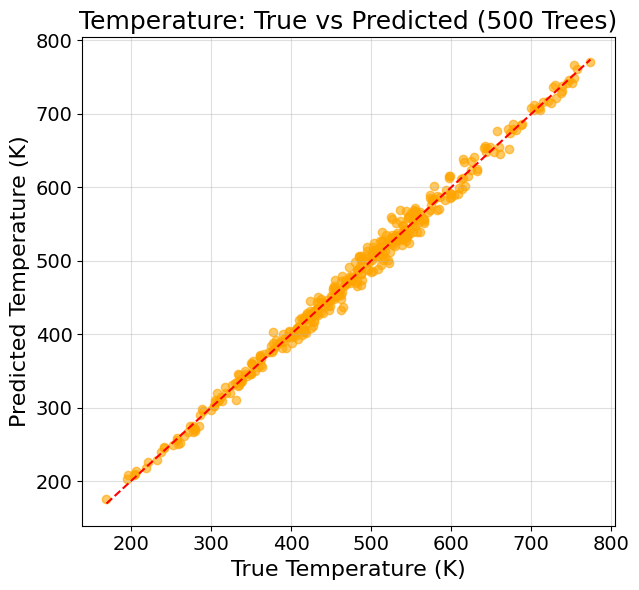


🌲 Training RandomForest with 1000 trees...


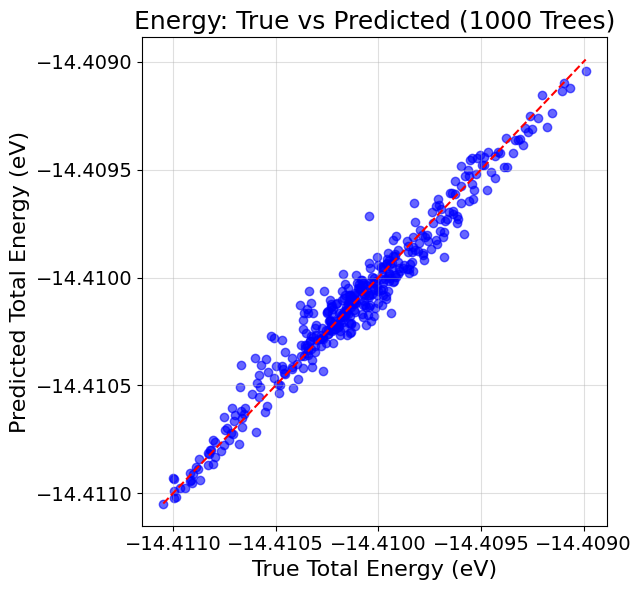

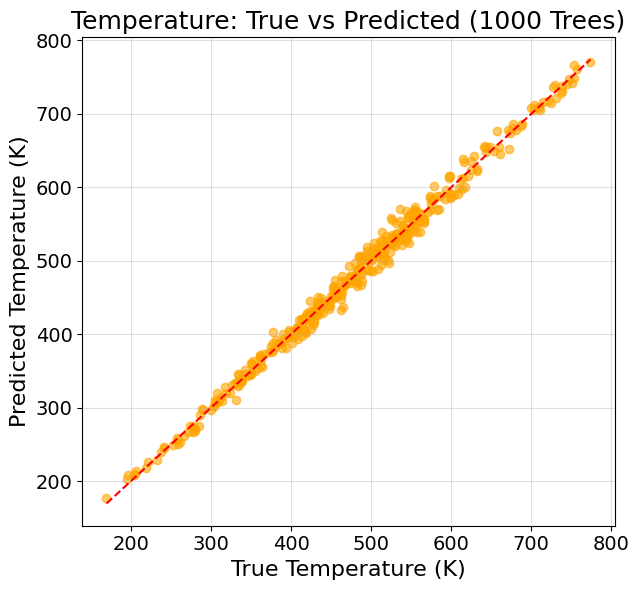


🌲 Training RandomForest with 2000 trees...


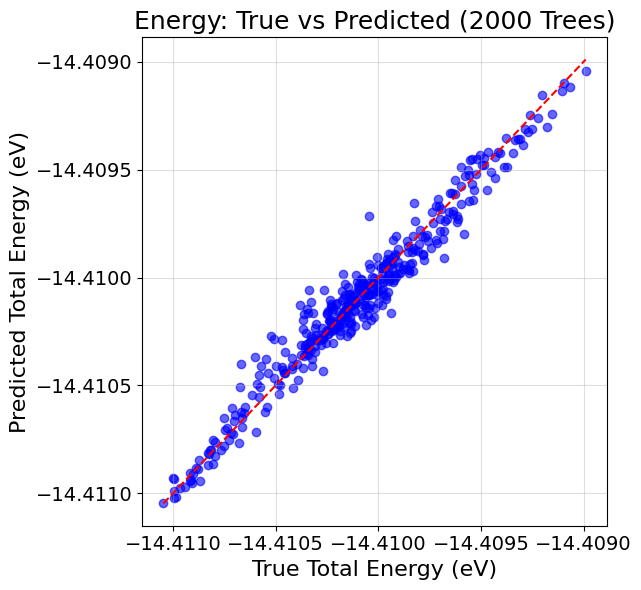

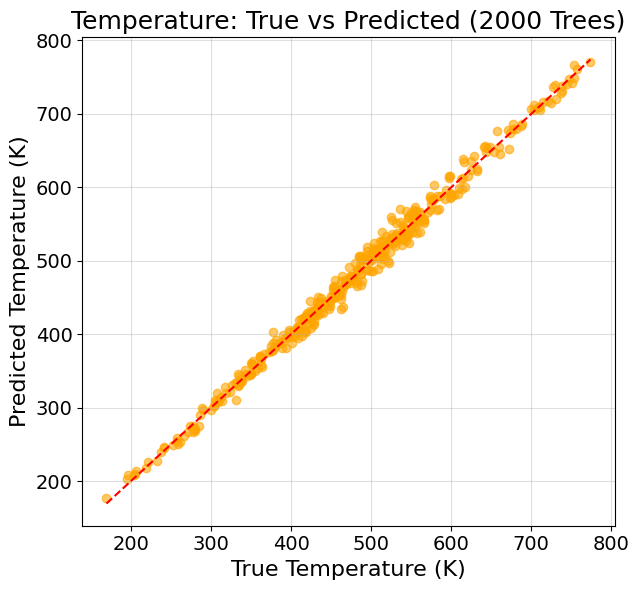


🌲 Training RandomForest with 5000 trees...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import os

# === Load combined feature data ===
data_path = "../MD/outputs/md_features_output.txt"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"❌ Feature file not found: {data_path}")

data = pd.read_csv(data_path, sep="\t")

# === Define input features (X) and targets (y) ===
X = data[[
    "Volume(Å³)",
    "Pressure(GPa)",
    "MeanForce(eV/Å)",
    "MaxForce(eV/Å)",
    "Stress_xx(GPa)",
    "Stress_yy(GPa)",
    "Stress_zz(GPa)"
]]
y_energy = data["TotalEnergy(eV)"]
y_temp = data["Temperature(K)"]

# === Split into train/test sets ===
X_train, X_test, y_train_e, y_test_e = train_test_split(X, y_energy, test_size=0.2, random_state=42)
_, _, y_train_t, y_test_t = train_test_split(X, y_temp, test_size=0.2, random_state=42)

# === Define epochs (trees) ===
epochs = [500, 1000, 2000, 5000, 7000]

train_errors_energy, test_errors_energy = [], []
train_errors_temp, test_errors_temp = [], []

plt.rcParams.update({
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14
})

for n in epochs:
    print(f"\n🌲 Training RandomForest with {n} trees...")

    # --- Energy model ---
    model_energy = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    model_energy.fit(X_train, y_train_e)
    y_pred_train_e = model_energy.predict(X_train)
    y_pred_test_e = model_energy.predict(X_test)

    train_rmse_e = np.sqrt(mean_squared_error(y_train_e, y_pred_train_e))
    test_rmse_e = np.sqrt(mean_squared_error(y_test_e, y_pred_test_e))
    train_errors_energy.append(train_rmse_e)
    test_errors_energy.append(test_rmse_e)

    # --- Temperature model ---
    model_temp = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    model_temp.fit(X_train, y_train_t)
    y_pred_train_t = model_temp.predict(X_train)
    y_pred_test_t = model_temp.predict(X_test)

    train_rmse_t = np.sqrt(mean_squared_error(y_train_t, y_pred_train_t))
    test_rmse_t = np.sqrt(mean_squared_error(y_test_t, y_pred_test_t))
    train_errors_temp.append(train_rmse_t)
    test_errors_temp.append(test_rmse_t)

    # === Plot: True vs Predicted ===
    plt.figure(figsize=(6.5, 6))
    plt.scatter(y_test_e, y_pred_test_e, c='blue', alpha=0.6)
    plt.plot([y_test_e.min(), y_test_e.max()], [y_test_e.min(), y_test_e.max()], 'r--')
    plt.xlabel("True Total Energy (eV)")
    plt.ylabel("Predicted Total Energy (eV)")
    plt.title(f"Energy: True vs Predicted ({n} Trees)")
    plt.grid(True, alpha=0.4)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6.5, 6))
    plt.scatter(y_test_t, y_pred_test_t, c='orange', alpha=0.6)
    plt.plot([y_test_t.min(), y_test_t.max()], [y_test_t.min(), y_test_t.max()], 'r--')
    plt.xlabel("True Temperature (K)")
    plt.ylabel("Predicted Temperature (K)")
    plt.title(f"Temperature: True vs Predicted ({n} Trees)")
    plt.grid(True, alpha=0.4)
    plt.tight_layout()
    plt.show()

# === Plot RMSE vs Epochs ===
plt.figure(figsize=(7.5, 5))
plt.plot(epochs, train_errors_energy, 'bo-', label="Train RMSE (Energy)")
plt.plot(epochs, test_errors_energy, 'r^-', label="Test RMSE (Energy)")
plt.xlabel("Number of Trees (Epochs)")
plt.ylabel("RMSE (eV)")
plt.title("Energy: Train vs Test RMSE over Epochs")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7.5, 5))
plt.plot(epochs, train_errors_temp, 'bo-', label="Train RMSE (Temperature)")
plt.plot(epochs, test_errors_temp, 'r^-', label="Test RMSE (Temperature)")
plt.xlabel("Number of Trees (Epochs)")
plt.ylabel("RMSE (K)")
plt.title("Temperature: Train vs Test RMSE over Epochs")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# === Print summary ===
print("\n✅ Training complete. Summary of errors:")
for i, n in enumerate(epochs):
    print(f"{n} trees → Energy RMSE: train={train_errors_energy[i]:.8e}, test={test_errors_energy[i]:.8e}; "
          f"Temp RMSE: train={train_errors_temp[i]:.4f}, test={test_errors_temp[i]:.4f}")


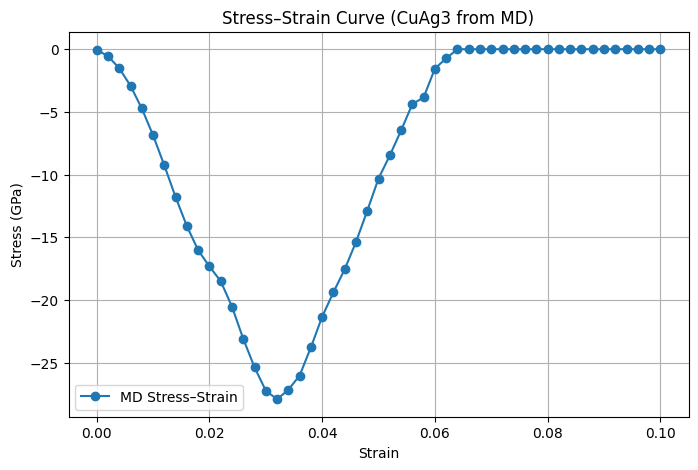

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load stress–strain data ===
data = pd.read_csv("../MD/outputs/stress_strain.txt", sep="\t")

plt.figure(figsize=(8,5))
plt.plot(data["Strain"], data["Stress(GPa)"], marker='o', label="MD Stress–Strain")
plt.xlabel("Strain")
plt.ylabel("Stress (GPa)")
plt.title("Stress–Strain Curve (CuAg3 from MD)")
plt.grid(True)
plt.legend()
plt.show()
